# 从0开始的RNN--语言模型与数据集
假设长度为$T$的文本序列中的词元依次为$x_1, x_2, \ldots, x_T$。 于是，$1 \leq t \leq T$可以被认为是文本序列在时间步处的观测或标签。 在给定这样的文本序列时，**语言模型（language model）** 的目标是估计序列的联合概率
$P(x_1, x_2, \ldots, x_T).$ (8.3.1)

例如，只需要一次抽取一个词元， 一个理想的语言模型就能够基于模型本身生成自然文本。与猴子使用打字机完全不同的是，从这样的模型中提取的文本 都将作为自然语言（例如，英语文本）来传递。 只需要基于前面的对话片断中的文本， 就足以生成一个有意义的对话。 显然，我们离设计出这样的系统还很遥远， 因为它需要“理解”文本，而不仅仅是生成语法合理的内容。

尽管如此，语言模型依然是非常有用的。 例如，短语“to recognize speech”和“to wreck a nice beach”读音上听起来非常相似。 这种相似性会导致语音识别中的歧义，但是这很容易通过语言模型来解决， 因为第二句的语义很奇怪。 同样，在文档摘要生成算法中， “狗咬人”比“人咬狗”出现的频率要高得多， 或者“我想吃奶奶”是一个相当匪夷所思的语句， 而“我想吃，奶奶”则要正常得多。


## 停用词与奇普夫定律
最流行的词看起来很无聊， 这些词通常被称为停用词（stop words），因此可以被过滤掉。 尽管如此，它们本身仍然是有意义的，我们仍然会在模型中使用它们。
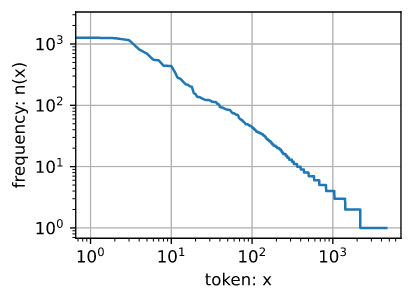
通过此图我们可以发现：词频以一种明确的方式迅速衰减。 将前几个单词作为例外消除后，剩余的所有单词大致遵循双对数坐标图上的一条直线。 这意味着单词的频率满足齐普夫定律（Zipf’s law）， 即第$i$个最常用单词的频率$n_i$为：
$n_i \propto \frac{1}{i^\alpha},$
(8.3.7)
等价于
$\log n_i = -\alpha \log i + c,$
(8.3.8)
其中$\alpha$是刻画分布的指数，$c$是常数。 这告诉我们想要通过计数统计和平滑来建模单词是不可行的， 因为这样建模的结果会大大高估尾部单词的频率，也就是所谓的不常用单词。
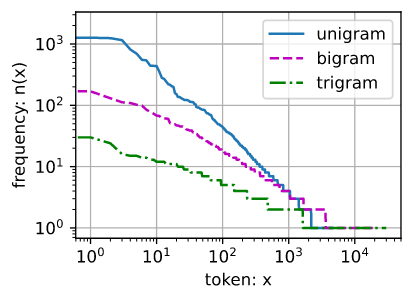
除了一元语法词，单词序列似乎也遵循齐普夫定律， 尽管公式 (8.3.7)中的指数$\alpha$更小 （指数的大小受序列长度的影响）。

## 